In [24]:
import warnings
warnings.filterwarnings('ignore')


In [38]:
from pandas.plotting import scatter_matrix

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils

from pylab import mpl, plt
import datetime
import tensorflow as tf
from tensorflow import keras
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [39]:
from tensorflow.keras.datasets import mnist 


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
"""
train_images and train_labels form the training set, the data that the model will learn from.
The Model will be tested on the test set, test_images and test_labels.

The images are encoded as np arrays, and the labels are an array of digits, ranging from 0:9
Images and labels have a one-to-one correspondence

"""

display(train_images.shape)

display(len(train_labels))

display(test_images.shape)

display(len(test_labels))

display(test_labels)

(60000, 28, 28)

60000

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
"""
# The network architecture.
The core building block of neural networks is the layer, a data-processing module that you can think of as a filter for data
Data does in and comes out in a more usefull form. Layers extract representations out of the data fed into them.
Most deep learning consists of chaining together simple layers that will implement a for, of progressive data distillation.


"""


from tensorflow.keras import models 
from tensorflow.keras import layers

network = models.Sequential()


# dense|fully connected neural layer. 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# a 10-way layer, will return an array of 10 probabikity scores summing to 1.
network.add(layers.Dense(10, activation='softmax'))

In [42]:
"""
To make the network ready for training, we need to pick three more things, as part 
of the compilation step:

* A loss function -- How the network will be able to measure its performance on the training data, and thus how it will 
    be able to steer itself in the right direction.

* An optimizer -- The mechanism through which the network updates itself based on the data it sees and its loss function

* Metrics to monitor during training and testing -- Here, we'll only care about accuracy.
    (fraction of images correctly classified).
    
"""


network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [43]:
"""
Before training, we'll preprocess the data by reshaping it into the shape the network expects and scaling it
so the all values are in the [0, 1] interval. Previosly, our training images, for instance,
were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.
We transform it into a float32 array of shape (60000. 28 * 28) with values between 0 and 1.
"""

train_images = train_images.reshape((60000, 28 * 28))

train_images = train_images.astype('float') / 255

In [44]:
test_images = test_images.reshape((10000, 28 * 28))

test_images = test_images.astype('float') / 255

In [47]:
# We also need to categorically encode the labels

from tensorflow.keras.utils import to_categorical


train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

In [48]:
# We are now ready to train the network which in keras is done via a call to the networks fir metthod.
# We fit the model to its training data

network.fit(train_images, train_labels,epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2586 - acc: 0.9258
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1044 - acc: 0.9691
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0694 - acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0499 - acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0381 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0293 - acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0225 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0170 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0132 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 

In [49]:
"""
Two quantities are displayed during training: the loss of the network over the training data,
and the accuracy of the network over the training data.


Let's check that the model performs well on the test set, too:
"""

test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:',  test_acc)


10000/10000 [==============================] - 0s 18us/sample - loss: 0.0737 - acc: 0.9815
test_acc: 0.9815


In [59]:
"""
# Data representaions for neural networks
In general, all current machine learning systems use tensors as their basic data structure. 

Tensor: at its core, a tensor is a container for data-- almost always numerical data. So, it's a container for numbers.
Matrices are2d tensors; tensors are a generelization of matrices to an arbitrary number of dimensions.
(note that in the context of tensors, a dimension is often called an axis)



# Scalars (OD tensors)
A tensor that contains only one number is called a scalar(or scalar tensor, or 0-dimensional tensor, or 0D tensor). In Numpy
a float32 or float64 number is a scalar tensor (or scalar array). You can display the number of axes of a numpy tensor viaa
the ndim attribute; a scalar tensor has 0 axes (nim == 0).The number of axes of a tensor is also called its rank.

"""

x = np.array(12)

display(x)

display(x.ndim)

# Vectors (1d tensors)
# An array of numbers is called a vector, or 1d tensor. A 1d tensor is said to hace exactly one axis

xx= np.array([12, 3, 6, 14])

display(xx)

display(xx.ndim)

# This vector has five entries and so is called a 5-dimensional vector. Dont confuse a 5d vector with a 5d tesnor!
# A 5d vector has only one axis and has five dimensions along its axis,
# A 5d tensor has five axes (and may have any number of dimensions along each axis)
# Dimensionality can denote either the number of entries along a specific axis(as in case of 5d vector)
# or the umber of axes in a tensor (such as in a 5d tensor), 

# Matrices (2D tensors)

# An array of vectors is a matrix, or 2d tensor. A matrix has two axes (often referred to rows and colunms).
# you can visulaly interpert a matrix a as a rectangular grid of numbers.

x_ma = np.array([[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]])

display(x_ma)

display(x_ma.ndim)

# 3D tensors and higer dimensional tensors

# if you pack such matrices into a new array, you obtain a 3d tensor

xDDD = np.array([[[5, 78, 2, 34, 0],
                 [6, 79, 3, 35, 1],
                 [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                 [6, 79, 3, 35, 1,
                 [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                 [6, 79, 3, 35, 1],
                 [7, 80, 4, 36, 2]]]])

display(xDDD)

array(12)

0

array([12,  3,  6, 14])

1

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

2

array([[list([5, 78, 2, 34, 0]), list([6, 79, 3, 35, 1]),
        list([7, 80, 4, 36, 2])],
       [list([5, 78, 2, 34, 0]),
        list([6, 79, 3, 35, 1, [7, 80, 4, 36, 2]]),
        list([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])]],
      dtype=object)

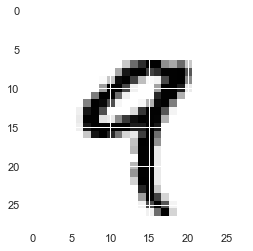

In [66]:
"""
# Key attributes: A tensor is defined by three key atrributes:

* Number of axes (rank) - For instance, a 3D tensor has three axes, and a matrix has two axes.
This is also called the tensor's ndim.

* Shape - This is a tubple of intergers that describes how many dimensions the tensor has along each axis.
For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5).
A vector has s shape with s single element, such as (5,), whereas a scalar has en empty shape,().

* Data type (usually called dtype in py libs) - This is the type of the data caontained in the tensor; for instancce,
a tensor;s type could be float32, uint8, and so on. 

NOTE - Strings dont live in preallocated, contiguous momoey segments:
    and strings, being variable length, would preclude the use of this implementaion.

"""

from tensorflow.keras.datasets import mnist 


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# displaying image

digit = train_images[4]


plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [ ]:
"""
# Manipulation of tensors in Numpy:
Selecting specific elements in a tensor is called tensor slicing.
The tensor-slicing operations you can do on Numpy arrays
"""

# selects digits #10 to #100 (#100 is not included) puts them in an array shape (90, 28, 28)

my_slice = train_images[10:100]

print(my_slice.shape)

# Equivalnnet 

my_slice_eq = train_images[10:100, :, :]

display(my_slice_eq.shape)

# also rquvialent to the previous example 

my_slice_22 = train_images[10:100, 0:28, 0:28]

display(my_slice_22.shape)


# select betwwen any two indices along each tensor axis. To selelect 14 x 14 pixels centered in the middle, you do this:

myslice = train_images[:, 7:-7, 7:-7]

plt.imshow(myslice[9], cmap=plt.cm.binary)

plt.show()

# The notion of data batches: In general, the first axis )axis 0, because indexing starts at 0) in all data tensors you'll 
# come across in deep learning will be the samples aaxis (the samples dimension) 
# deep learning model doent process an entire daset at once; rather, they break the data into small batches.
# Concretely, here's one batch of our MNIST digits, with batch size of 218:

batch = train_images[:128]

# And here's the next batch:

batchDos = train_images[128:256]

# and the nth batch:

#batchN = train_images[128 * n:128 * (n + 1)]

# display(batchN)

(90, 28, 28)


(90, 28, 28)

(90, 28, 28)

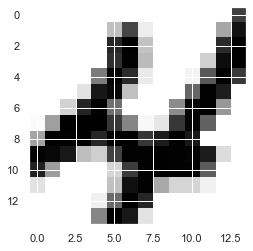

In [86]:
# When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension.
# This is a term you'll  frequently encounter when using Keras and other deep-learning-libraries.

# Real-world examples of data tensors
# Data you'll manipulate will almost always fall into one of the following categories:

# Vector data - 2D tensors of shape (sample, features)

# Time series data or sequence data - 3D tensors of shape (samples, timesteps, features)

#Images - 4D tesnors of shape (samples, height, width, channels) or (samples, channels, height, width)

# Video - 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

# Vector data 


In [87]:
def naiave_relu(x):
    assert len(x.shape) ==2
    
    x = x.copy
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [88]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape(x.shape[1])):
            x[i, j] += y[i, j]
    return x


In [89]:
#z = x + y  # Element-wise addition
#z = np.maximum(z, 0.)

NameError: name 'y' is not defined

In [91]:
def naive_add_matrix_and_vecotr(x, y):
    assert len(x.shape) == 2 # x is a 2d Numpy tensor 
    assert len(y.shape) == 1 # y is a numpy vector
    assert x.shape[1] == y.shape[0]
    
    x = x.copy() # Avoid oversriting the input tesor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i]
    
    return x


In [100]:
"""
With broadcasting, you can genrally apply two-tensor element-wise oprations if one tensor has shape
(a, b, ... n , n + 1, ...m) and the other shape (n, n + 1, .. m).
the broadcasting will then automatically happen for axes a through n -1.
    The following example applies the element-wise maximum operaion to two tensors of different shapes via broadcasting:
"""

x = np.random.random((64, 3, 32, 10)) # x is a random tensor with shape (54, 3, 32, 10)

y = np.random.random((32, 10)) # y is a random tensor with shape (32, 10)

z = np.maximum(x, y)  # The output z has shape (64, 3, 32, 10) like x

display(z[0][0][0])



array([0.75075778, 0.7235887 , 0.69396748, 0.32392544, 0.73920156,
       0.3277758 , 0.30852156, 0.98417978, 0.48482687, 0.60765964])

In [104]:
"""
Tensor dot: The dot operation, also called a tensor product (not to be confused with an element-wise product)
is the most common, most useful tensor operation. Contray to elemnt-wise operations,
it combines entries in the input tensors. An element-wise product is done with the * operator in Numpy, Keras, Theano & Tf.
dot uses a diffrent syntax in tf, but in both numpy and keras its done using the standard dot operator
"""
x = 5 
y = 4

z = np.dot(x, y)

#z = x . y

# In mathematical notation, you'd note the operation with a dot (.):

def naive_vector_dot(x, y):
    assert len(x.shape) == 1 
    assert len(y.shape) == 1 
    assert x.shape[0] == y.shape[0]
    z = 0 
    for i in range(x.range[0]):
        x += x[i] * y[i]
    return z
    

In [ ]:
"""
# Tensor reshaping:
A third type of tensor operation that's essential to understand is tensor reshaping>
Used when we preprocess digit data before feeding it our network:
"""

# train_images = train_images.reshape((60000, 28 * 28))

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

display(x.shape)

xx = x.reshape((6, 1))

display(xx)

xxx = x.reshape((2, 3))

display(xxx)

In [111]:
# A special case of reshaping that's commonly encountered is transposition. Transposing a matrix means exchanging its rows
# and its columns, so that x[i, :]: becomes x[:, i]:

x = np.zeros((300, 20))

x = np.transpose(x)

print(x.shape)

(20, 300)


In [114]:
# Chapter 3 Getting started with neural networks

from tensorflow.keras import layers 

layer = layers.Dense(32, input_shape=(784,))

In [125]:
mod = models.Sequential()

mod.add(layers.Dense(32,
                     activation= 'relu',
                     input_shape=(784,)))

mod.add(layers.Dense(10,
                     activation='softmax'))

# and here's tje same model defined using the functional API:

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu') (input_tensor)
output_tensor = layers.Dense(10,activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Once architecture is made it doesnt matter whether you used a sequential mod or func api. All next steps are the same.
# The learning process is configured in the complitation step. where you specify the optimiser and loss fucntion(s)
# that the model should usem as well as the mstrrics you want to monitor during training.

from tensorflow.keras import optimizers

mod.compile(optimizer = optimizers.RMSprop(lr=0.001),
                  loss='mse',
                  metrics=['accuracy'])

# the learning process consists of passing Numpy arrays of imput data (and the correspinging target data) to the model via fit()

# mod.fit(input_tensor, output_tensor, batch_size=128, epochs=10)

